<a href="https://colab.research.google.com/github/bggonza6/CHM343/blob/main/CHM343_LAB_1_BLAKE_GONZALES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**ASU CHM 343 Physical Chemistry Lab 1 - Notebook**
## Calculating Heat Capacity Ratio and Speed of Sound from White Noise

31Jan2025

**Blake Gonzales**, bggonza6@asu.edu

# **Abstract**

An acoustic interferometry experiment was used to determine the speed of sound of Ar, N_2, CO_2, and an unknown gas. This method involves generating white noise sound waves in a tube filled with a gas and analyzing the resonant frequencies. The data was Fourier transformed to plot the peak vs. node to obtain the speed of sound by using the tube length. One of the gases, Ar, has a well known speed of sound and was used to determine the tube length. By using the calculated speed of sound, the heat capacity ratio (γ), also known as the adiabatic index, was calculated.

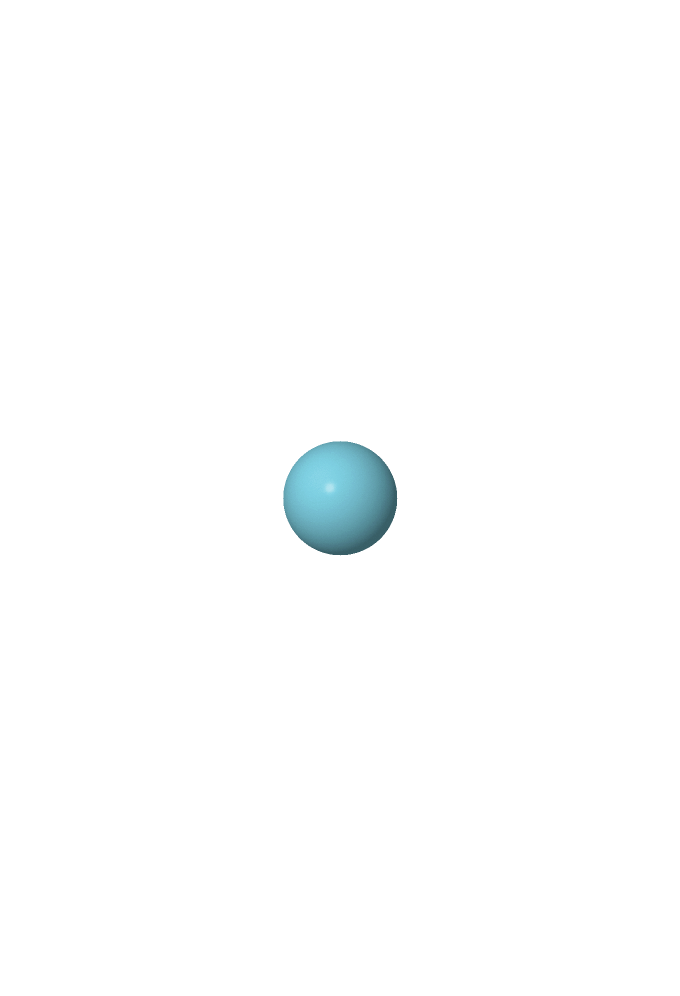

Figure 1. A Molecalc representation of Ar, one of the gases used in this experiment

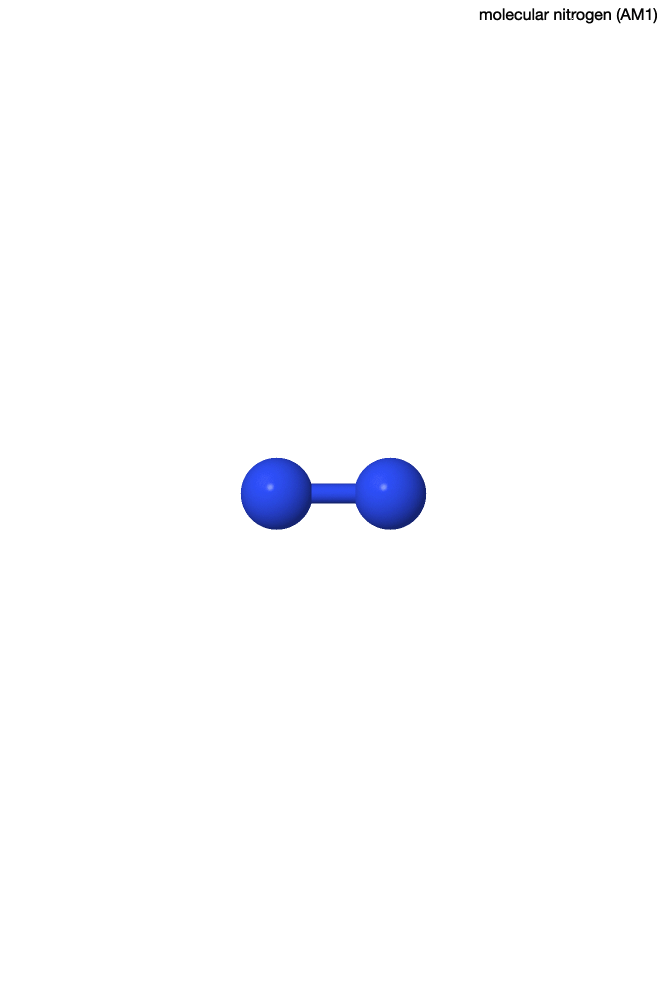

Figure 2. A Molecalc representation of Nitrogen, one of the gases used in this experiment.

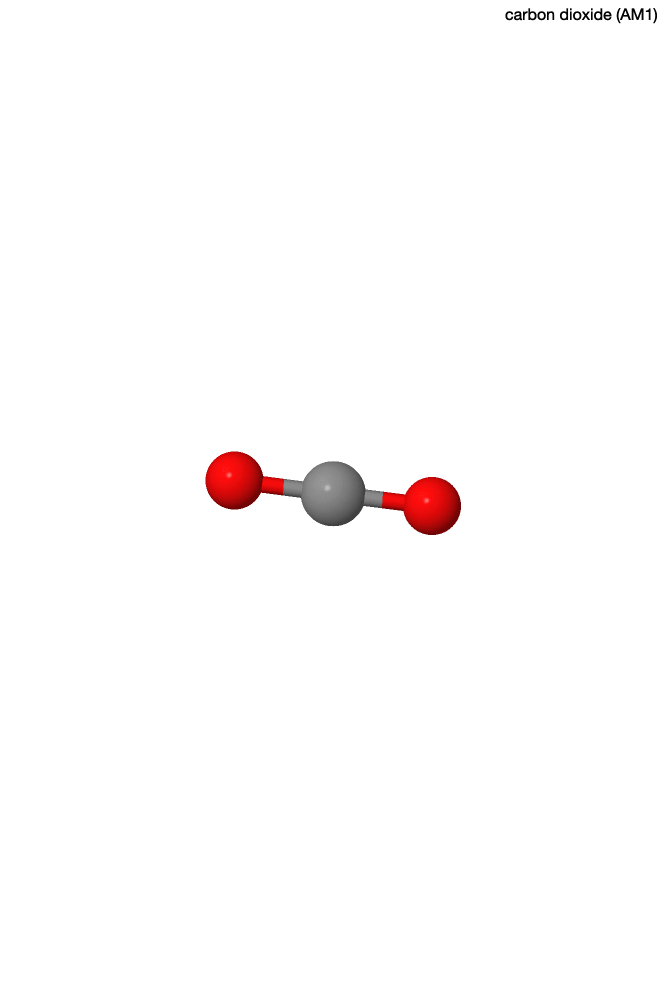

Figure 3. A Molecalc representation of Carbon Dioxide, one of the gases used in this experiment.

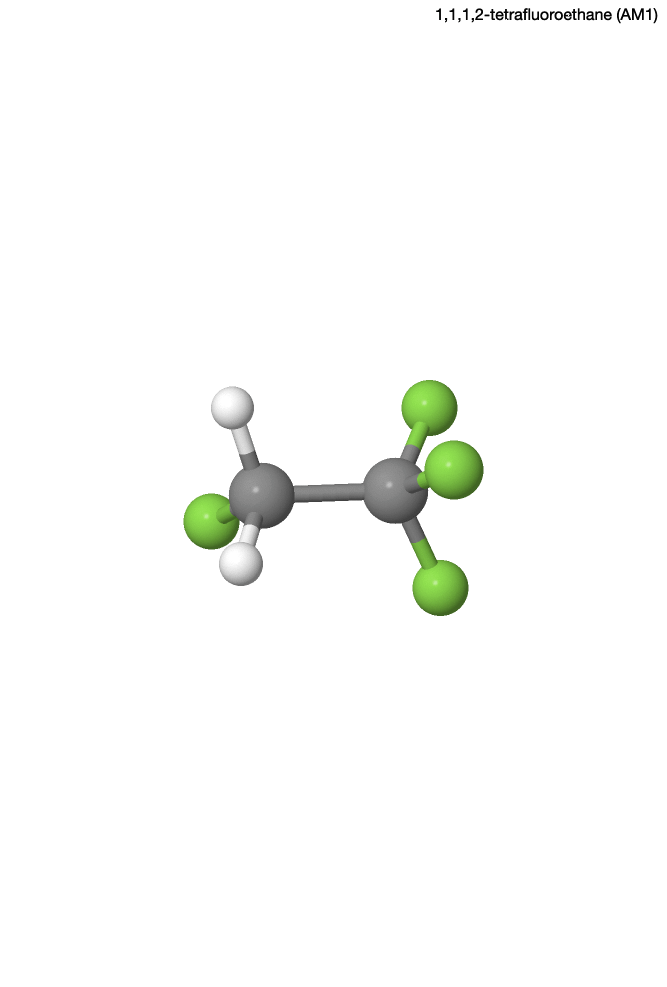

Figure 4. A Molecalc representation of R134a, the hypothesized identity of the unknown gas in this experiment.

# **Set up Notebook Environment**


In [ ]:
#IO and Basic Python Libraries
import os
import io
import zipfile as zf
import requests
import shutil
from IPython import display
from six.moves.urllib.request import urlopen

#Data Analysis and Visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.offsetbox import AnnotationBbox
import matplotlib.patches as patches
from scipy.signal import find_peaks
from scipy import stats
from scipy.stats import t

In [ ]:
# Read in audacity exported spectral data using pandas
# White Noise Spectrum
White_Noise_Spectrum = pd.read_table('https://raw.githubusercontent.com/bggonza6/CHM343/main/2025_01_28_WHITE_NOISE_SPECTRUM.txt', sep = "\t" ,header=0)
# Argon White Noise Spectrum
Argon_Spectrum = pd.read_table('https://raw.githubusercontent.com/bggonza6/CHM343/main/2025_01_28_ARGON_SPECTRUM.txt', sep = "\t" ,header=0)
# Carbon Dioxide White Noise Spectrum
Carbon_Dioxide_Spectrum = pd.read_table('https://raw.githubusercontent.com/bggonza6/CHM343/main/2025_01_28_CARBON_DIOXIDE_SPECTRUM.txt', sep = "\t" ,header=0)
# Nitrogen White Noise Spectrum
Nitrogen_Spectrum = pd.read_table('https://raw.githubusercontent.com/bggonza6/CHM343/main/2025_01_28_NITROGEN_SPECTRUM.txt', sep = "\t" ,header=0)
# Refrigerant White Noise Spectrum
R134a_Spectrum = pd.read_table('https://raw.githubusercontent.com/bggonza6/CHM343/main/2025_01_28_REFRIGERANT_1_SPECTRUM.txt', sep = "\t" ,header=0)


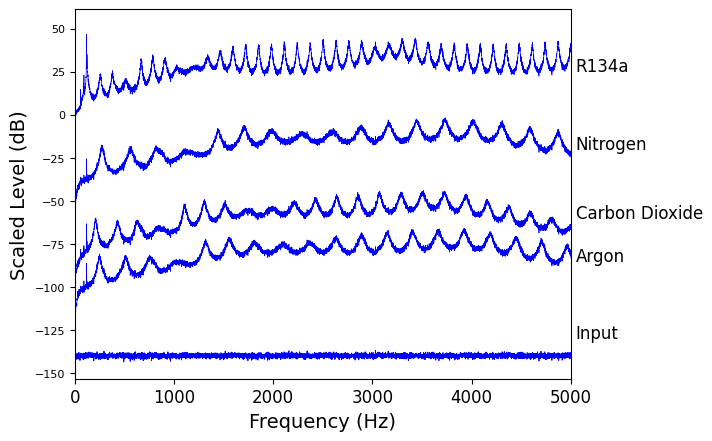

In [ ]:
# @title
# Initialize matplotlib subplot layout
fig, ax = plt.subplots()

# Set general font size
plt.rcParams['font.size'] = '11'

ax.plot(White_Noise_Spectrum['Frequency (Hz)'], White_Noise_Spectrum['Level (dB)']-90, linewidth=0.6, color = 'blue', label = 'Noise')
ax.plot(Argon_Spectrum['Frequency (Hz)'], Argon_Spectrum['Level (dB)']-20, linewidth=0.5, color = 'blue', label = 'Argon')
ax.plot(Carbon_Dioxide_Spectrum['Frequency (Hz)'], Carbon_Dioxide_Spectrum['Level (dB)'], linewidth=0.5, color = 'blue', label = 'Carbon Dioxide')
ax.plot(Nitrogen_Spectrum['Frequency (Hz)'], Nitrogen_Spectrum['Level (dB)']+45, linewidth=0.5, color = 'blue', label = 'Nitrogen')
ax.plot(R134a_Spectrum['Frequency (Hz)'], R134a_Spectrum['Level (dB)']+90, linewidth=0.5, color = 'blue', label = 'R134a')

# Plot x and y axis min/max limits for plot
plt.xlim(0, 5000)
#plt.ylim(0, 15000000)

plt.xlabel("Frequency (Hz)", fontsize=14)
plt.ylabel("Scaled Level (dB)", fontsize=14)

# plot legend and axes
#ax.legend(loc = 'upper left', fontsize=9)
#ax.get_yaxis().set_visible(False)
#ax.spines['top'].set_visible(False)
#ax.spines['right'].set_visible(False)
#ax.spines['bottom'].set_visible(False)
#ax.spines['left'].set_visible(False)

# Annotate Plot with text
ax.text(5050, 25, 'R134a', fontsize=12)
ax.text(5050, -20, 'Nitrogen', fontsize=12)
ax.text(5050, -60, 'Carbon Dioxide', fontsize=12)
ax.text(5050, -85, 'Argon', fontsize=12)
ax.text(5050, -130, 'Input', fontsize=12)

# Display the Plot
plt.show()

Figure 5. White noise sound (bottom) at an amplitude of 0.5 for a duration of 30 sec, which is played through a speaker (earbud), while sound is recorded using a microphone at the opposite end of a ~2 ft tube with one of the 4 gases inside. The Fourier transform of the resulting sound data results in frequency spectral data, which is used to observe the acoustic interferometry resonance frequency modes that depend on the length of the tube (which is constant) and the speed of sound of the gas in the tube (which varies with the composition of the gas that is in the tube).

# **Introduction**

This experiment uses a remote experiment setup to determine the speed of sound and related thermodynamic properties of gases. In the experiment, the student utilized a VPN to login to a lab on the ASU campus. Once online, there were controls to flow gas through a tube. The tube had a speaker on one end and a microphone on the other end. White noise was generated for the sound as white noise has a uniform distribution of frequency components. A recording of the sound while gas was in the tube was performed to obtain an interferogram. This data was then plotted to produce a frequency spectrum of the standing waves. The resonant frequency versus node number was generated in a Fourier transform and the slope of this line was used to calculate the speed of sound, after calculating the tube length from a gas with a known speed of sound. The calculated speed of sound was used to determine the heat capacity ratio. The experiment demonstrated the use of interferometry as a powerful way to determine important thermodynamic properties of gases (1). The use a tube to measure the speed of sound (c) and also the heat capacity ratio (γ) dates to the mid-19th century (2).


# **Methods**

All calculations were performed with the assumption of the ideal gas equation of state, pV_M=RT. The first gas ran in the experiment was Argon. Argon has a known c, 322m/s, which was used to calculate the length of the tube. An equation was given in reference (1) to calculate the tube length with a known c. This calculation was performed with Argon. A graph and calculations are provided below. To calculate the speed of sound for Nitrogen, Carbon Dioxide, and the unknown refrigerant a formula was utilized provided in reference (1) that relates the speed of sound to frequency and wavelength. Once all of the data was collected python with scipy was used to find the peaks of the graphed data. The peaks were used to create a Fourier transform to find the slopes and calculate the speed of sound, c. The speed of sound was calculated by multiplying 2*L*slope from the graph. The associated uncertainty was calculated by multiplying the uncertainty of the slope by 2L. The speed of sound was then used to calculate the Cp/Cv ratio, ($γ$). ($γ$) was calculated by multiplying c^2*M/(RT) where M is the molar mass and T is the temperature from thermocouple 2 which is what the ideal equation of state reduces to. The error was then calculated by multiplying the error in c*2*M/(R*T). The Error Analysis Review was utilized while calculating error and uncertainty (5). The Heat Capacity Ratio ($γ$) is the ratio of the heat capacity at a constant pressure divided by the heat capacity at a constant volume. This ratio is directly related to the speed of sound ($c$) squared and the Molar Mass ($M$). It is inversely proprotional to the Ideal Gas Constant ($R$) and the Temperature ($T$) (3).
<br><br>
$γ = \left( \frac{Mc^2}{RT} \right) $
<br><br> The graphical representation and calculations are provided below. Error analysis was performed for all of the calculations and provided below. Additional graphs and data analysis is provided in Supplemental Information.

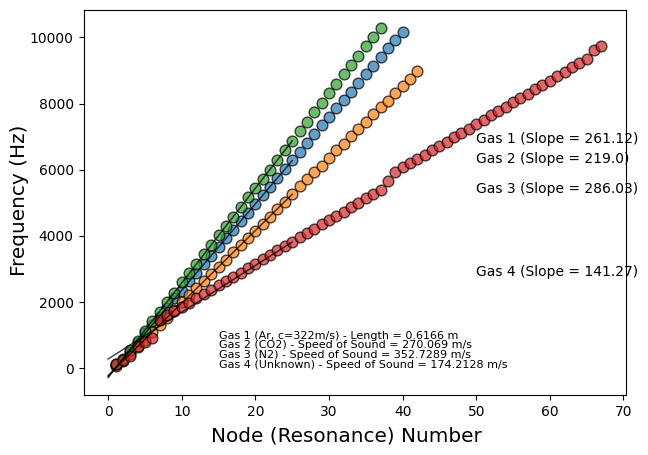

In [ ]:
# Initialize plot layout
fig, ax = plt.subplots(figsize = (7, 5))

# Set general font size
plt.rcParams['font.size'] = '12'

# Set X and Y Axis Labels for subPlots
fig.supxlabel('Node (Resonance) Number')
fig.supylabel('Frequency (Hz)')

# Set tick font size
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
	label.set_fontsize(10)

# Add scatter plots
ax.scatter(gas2_peaktable['Node'], gas2_peaktable['Frequency (Hz)'], s=60, alpha=0.7, edgecolors="k")
ax.scatter(gas3_peaktable['Node'], gas3_peaktable['Frequency (Hz)'], s=60, alpha=0.7, edgecolors="k")
ax.scatter(gas5_peaktable['Node'], gas5_peaktable['Frequency (Hz)'], s=60, alpha=0.7, edgecolors="k")
ax.scatter(gas6_peaktable['Node'], gas6_peaktable['Frequency (Hz)'], s=60, alpha=0.7, edgecolors="k")

# Fit linear regression via least squares with numpy.polyfit
# It returns a slope (b) and intercept (a)
# deg=1 means linear fit (i.e. polynomial of degree 1)
b1, a1 = np.polyfit(gas2_peaktable['Node'], gas2_peaktable['Frequency (Hz)'], deg=1)
b2, a2 = np.polyfit(gas3_peaktable['Node'], gas3_peaktable['Frequency (Hz)'], deg=1)
b3, a3 = np.polyfit(gas5_peaktable['Node'], gas5_peaktable['Frequency (Hz)'], deg=1)
b4, a4 = np.polyfit(gas6_peaktable['Node'], gas6_peaktable['Frequency (Hz)'], deg=1)

# Speed of Sound for Gases 1 (Ar)
c1 = 322

# Determine the Acoustic Interferometer resonance tube length (L) for Gas 1 (Ar)
l1 = c1/(2*b1)

# Determine the Speed of Sound (c) Carbon Dioxide, Nitrogen, and (R134a) in m/s.
c2 = (l1)*(2*b2)
c3 = (l1)*(2*b3)
c4 = (l1)*(2*b4)

# Create sequence of 10 numbers from 298 to 365
xseq = np.linspace(0, 25, num=26)

# Plot regression line
ax.plot(xseq, a1 + b1 * xseq, alpha=0.7, color="k", lw=1.1)
ax.plot(xseq, a2 + b2 * xseq, alpha=0.7, color="k", lw=1.1)
ax.plot(xseq, a3 + b3 * xseq, alpha=0.7, color="k", lw=1.1)
ax.plot(xseq, a4 + b4 * xseq, alpha=0.7, color="k", lw=1.1)


#Annotate Plot with text
ax.text(50, 6800, 'Gas 1 (Slope = {})'.format(round(b1,2)), fontsize=10)
ax.text(50, 6200, 'Gas 2 (Slope = {})'.format(round(b2,2)), fontsize=10)
ax.text(50, 5300, 'Gas 3 (Slope = {})'.format(round(b3,2)), fontsize=10)
ax.text(50, 2800, 'Gas 4 (Slope = {})'.format(round(b4,2)), fontsize=10)

ax.text(15, 900, 'Gas 1 (Ar, c=322m/s) - Length = {} m'.format(round(l1,4)), fontsize=8)
ax.text(15, 600, 'Gas 2 (CO2) - Speed of Sound = {} m/s'.format(round(c2,4)), fontsize=8)
ax.text(15, 300, 'Gas 3 (N2) - Speed of Sound = {} m/s'.format(round(c3,4)), fontsize=8)
ax.text(15, 0, 'Gas 4 (Unknown) - Speed of Sound = {} m/s'.format(round(c4,4)), fontsize=8)


#Show the plot in this notebook
plt.show()

Figure 6. Peaks from the sound data used to make this Fourier transform are plotted as Frequency vs. Node and fitted with Linear Regression with least squares in NumPY. This data is collected from the entire spectrum. Argon is in green, Carbon Dioxide in blue, Nitrogen in orange, and the unknown refrigerant is in red. Argon has a well known c which was used to calculate the length of the tube. The other gases used this calculated length to calculate a c value for them. The values of the slopes and speeds of sound are listed on the graph.The associated error is listed below.

In [ ]:
# Error Analysis - White Noise Sound Data (Frequency)

# Linear Regression using SciPy Stat Library
linearregression_gas1 = stats.linregress(gas2_peaktable['Node'], gas2_peaktable['Frequency (Hz)'])
linearregression_gas2 = stats.linregress(gas3_peaktable['Node'], gas3_peaktable['Frequency (Hz)'])
linearregression_gas3 = stats.linregress(gas5_peaktable['Node'], gas5_peaktable['Frequency (Hz)'])
linearregression_gas4 = stats.linregress(gas6_peaktable['Node'], gas6_peaktable['Frequency (Hz)'])

# Print R-squared values for each of the linear regression fits
print(f"Linear Regression R-squared")
print(f"Gas 1 - {linearregression_gas1.rvalue**2:.6f}")
print(f"Gas 2 - {linearregression_gas2.rvalue**2:.6f}")
print(f"Gas 3 - {linearregression_gas3.rvalue**2:.6f}")
print(f"Gas 4 - {linearregression_gas4.rvalue**2:.6f}")
print(f" ")


# Two-sided inverse Students t-distribution, p - probability, df - degrees of freedom
tinv = lambda p, df: abs(t.ppf(p/2, df))

print(f"95% Confidence Level (+/-)")
print(f"__________________________")
ts1 = tinv(0.05, len(gas2_peaktable['Node'])-2)
print(f"Gas 1")
print(f"slope = {linearregression_gas1.slope:.2f} +/- {ts1*linearregression_gas1.stderr:.2f}")
print(f"y-intercept = {linearregression_gas1.intercept:.2f}"
      f" +/- {ts1*linearregression_gas1.intercept_stderr:.2f}")
print(f" ")

ts2 = tinv(0.05, len(gas3_peaktable['Node'])-2)
print(f"Gas 2")
print(f"slope = {linearregression_gas2.slope:.2f} +/- {ts1*linearregression_gas2.stderr:.2f}")
print(f"y-intercept = {linearregression_gas2.intercept:.2f}"
      f" +/- {ts1*linearregression_gas2.intercept_stderr:.2f}")
print(f" ")

ts3 = tinv(0.05, len(gas5_peaktable['Node'])-2)
print(f"Gas 3")
print(f"slope = {linearregression_gas3.slope:.2f} +/- {ts1*linearregression_gas3.stderr:.2f}")
print(f"y-intercept = {linearregression_gas3.intercept:.2f}"
      f" +/- {ts1*linearregression_gas3.intercept_stderr:.2f}")
print(f" ")

ts4 = tinv(0.05, len(gas6_peaktable['Node'])-2)
print(f"Gas 4")
print(f"slope = {linearregression_gas4.slope:.2f} +/- {ts1*linearregression_gas4.stderr:.2f}")
print(f"y-intercept = {linearregression_gas4.intercept:.2f}"
      f" +/- {ts1*linearregression_gas4.intercept_stderr:.2f}")
print(f" ")

Linear Regression R-squared
Gas 1 - 0.999962
Gas 2 - 0.999965
Gas 3 - 0.999941
Gas 4 - 0.998263
 
95% Confidence Level (+/-)
__________________________
Gas 1
slope = 261.12 +/- 0.53
y-intercept = -251.63 +/- 12.50
 
Gas 2
slope = 219.00 +/- 0.41
y-intercept = -216.93 +/- 10.17
 
Gas 3
slope = 286.03 +/- 0.75
y-intercept = -277.08 +/- 16.43
 
Gas 4
slope = 141.27 +/- 1.48
y-intercept = 282.98 +/- 57.88
 


# **Results & Discussion**


In [ ]:
import pandas as pd
from IPython.display import HTML

In [ ]:
data = {'quantity': ['T, °C','slope', 'uncertainty', 'speed of sound, c-experimental', 'uncertainty', 'speed of sound, c-literature', 'error, %', 'heat capacity ratio, γ, experimental', 'uncertainty', 'heat capacity ratio, γ, literature', 'error, %'],
        'Ar': [21.6, 261.12, 0.53, 322.00, 0.65, 321.65, .109, 1.69, 2.1E-5, 1.67, 1.19],
        'CO2': [21.6, 219.00, 0.41, 270.07, 0.51, 268.35, .639, 1.31, 1.8E-5, 1.28, 2.32],
        'N_2': [21.6, 286.03, 0.75, 352.73, 0.92, 352, .207, 1.42, 2.1E-5, 1.4, 1.56],
        'R134a': [21.6, 141.27, 1.48, 174.2, 1.8, 163.81, 6.16, 1.26, 1.5E-4, 1.1, 13.9]}

In [ ]:
df = pd.DataFrame(data)
df = df.rename(columns={'N_2': 'N₂'})
df = df.rename(columns={'CO_2': 'CO₂'})

HTML(df.to_html(index=False, escape=False))


quantity,Ar,CO2,N₂,R134a
"T, °C",21.600000,21.600000,21.600000,21.60000
slope,261.120000,219.000000,286.030000,141.27000
uncertainty,0.530000,0.410000,0.750000,1.48000
"speed of sound, c-experimental",322.000000,270.070000,352.730000,174.20000
uncertainty,0.650000,0.510000,0.920000,1.80000
"speed of sound, c-literature",321.650000,268.350000,352.000000,163.81000
"error, %",0.109000,0.639000,0.207000,6.16000
"heat capacity ratio, γ, experimental",1.690000,1.310000,1.420000,1.26000
uncertainty,0.000021,0.000018,0.000021,0.00015
"heat capacity ratio, γ, literature",1.670000,1.280000,1.400000,1.10000


#Table 1. Student results for the slope, speed of sound, and heat capacity for various gases

The uncertainty is the error analysis from the number above. The % error is between the experimental and literature value. Values of the slope are in s^-1, speed of sound values are in m*s^-1, and heat capacity ratios are unitless. Literature values are taken from molecalc and are listed in the references.

Based on common refrigerants (4) and the listed speed of sounds (1) I determined the unknown refrigerant to be R134a. The speed of sound matched with a 6% error. In this experiment, the speed of sound of various gases by acoustic interferometry were measured. The results were accurate with the largest error in the refrigerant. Results could have been more accurate if the middle nodes were used rather than the whole spectrum, however, hours had already been spent on learning to use Colab and I was running out of time. The heat capacity ratios were then derived with the assumption that the gases behave ideally. The ratios had significantly higher error than the speed of sound revealing an observation of a deviation from ideal behavior. The lab temperature was also slightly different than used for the literature values. Through this experiment, we were able to utilize the relevance of interferometry and Fourier analysis to quickly and accurately create a frequency spectrum. A frequency spectrum is then easily utilized to obtain tube length, speed of sound, and adiabatic index (heat capacity ratio, (γ)).

Through this lab, observations were also made regarding the connection between speed of sound, adiabatic index, degrees of freedom, and what makes a gas a good refrigerant. Argon has the least degrees of freedom being monotomic and also has the highest adibatic index, making it harder energy to travel through it. Argon also only has translational and I thought it would have the highest speed of sound, but Nitrogen is a little higher. Nitrogen has the next highest adibatic index which makes sense given it is diatomic and has mainly translational, some rotational, and a tiny amount of vibrational. Carbon Dioxide has the second to lowest adiabatic index and speed of sound while also having vibrational, rotational, and primarily translational. R134a has the lowest adiabatic index and speed of sound while having translational, rotational, and primarily vibrational. Refrigerant having slow speed of sound would mean sound waves travel at a relatively slow rate due to particles being further apart and take longer to transfer the sound energy to each other. The low adiabatic index would imply R134a experiences a relatively small change in temperature and pressure when being compressed or expanded.

From these observations, a good refrigerant would have more degrees of freedom and also more vibrational with a low adiabatic index and speed of sound being preferred. The more degrees of freedom a molecule has, the slower the sound will travel through the gas. Sound pressure waves act as energy and the bigger molecules with vibrational degrees of freedom can absorb energy more efficiently without increasing temperature significantly.

# **References**

[1] Varberg, T. D.; Pearlman, B. W.; Wyse, I. A.; Gleason, S. P.; Kellett, D. H. P.; Moffett, K. L. Determining the Speed of Sound and Heat Capacity Ratios of Gases by Acoustic Interferometry. Journal of Chemical Education 2017, 94 (12), 1995–1998. https://doi.org/10.1021/acs.jchemed.7b00526.

[2] Kundt, A. Acoustic Experiments. London, Edinburgh Dublin Philos.
Mag. J. Sci. 1868, 35, 41−48.

[3] DeLomba, M. J.; Hernandez, M. D.; Stankus, J. J. Speed of Sound in Gases Measured by in Situ Generated White Noise. Journal of Chemical Education 2016, 93 (11), 1961–1964. https://doi.org/10.1021/acs.jchemed.6b00407.

[4] List of refrigerants. Wikipedia. https://en.wikipedia.org/wiki/List_of_refrigerants.

[5] CHM343. Colab-Notebooks/Data_and_Error_Analysis_Overview_Pchem_Lab.ipynb at main · CHM343/Colab-Notebooks. GitHub. https://github.com/CHM343/Colab-Notebooks/blob/main/Data_and_Error_Analysis_Overview_Pchem_Lab.ipynb (accessed 2025-02-01).

[6] Yarger, J. Determining the Speed of Sound and Related Heat Capacity Ra- Tios of Gases Using Acoustic Interferometry and Molecular Elec- Tronic Structure Calculations a Physical Chemistry Laboratory. https://biopchem.wordpress.com/wp-content/uploads/2025/01/lab1_handout_chm343_spring2025-1.pdf (accessed 2025-02-01).

[7] [Argon](https://molecalc.cloud/calculations/6b3f4bde9057eec464373aa95d463281)

[8] [Nitrogen](https://molecalc.cloud/calculations/61e3f4ce5efa9b3481a5f880ee22d16b)

[9] [Carbon Dioxide](https://molecalc.cloud/calculations/e7f0453de675a26c6cff895110084811)

[10] [R134a](https://molecalc.cloud/calculations/48d80ee28fe96de6e74b4171eee9e497)

[11] [Some Error Analysis was performed here](https://docs.google.com/spreadsheets/d/1AMhgr-E_KnaYLSMizSScyLi5cP5MjQM5jQEJroVx88g/edit?usp=sharing)



# **Supplemental Information**

Peer assistance

January 24 - your thread about connecting to CHM343 Google Drive

January 27 - Shaina notebook thread

January 27 - Shaina colab question thread

January 28 - My thread letting others take my instrument time

January 28 - Liye Zhu thread about canvas not working



More analysis, calculations, and error analysis is provided below.

In [ ]:
# @title
# python code using SciPy library for extracting resonance 'peak' locations in acoustic interferometry white noise spectral data


gas2_peaks = find_peaks(Argon_Spectrum['Level (dB)'], rel_height=100, distance = 200, prominence = 5)
gas3_peaks = find_peaks(Carbon_Dioxide_Spectrum['Level (dB)'], rel_height=100, distance = 200, prominence = 5)
gas5_peaks = find_peaks(Nitrogen_Spectrum['Level (dB)'], rel_height=100, distance = 200, prominence = 5)
gas6_peaks = find_peaks(R134a_Spectrum['Level (dB)'], rel_height=50, distance = 100, prominence = 10)


Gas2_Frequency = Argon_Spectrum['Frequency (Hz)']
Gas3_Frequency = Carbon_Dioxide_Spectrum['Frequency (Hz)']
Gas5_Frequency = Nitrogen_Spectrum['Frequency (Hz)']
Gas6_Frequency = R134a_Spectrum['Frequency (Hz)']

gas2_peak_list = Gas2_Frequency[gas2_peaks[0]]
gas3_peak_list = Gas3_Frequency[gas3_peaks[0]]
gas5_peak_list = Gas5_Frequency[gas5_peaks[0]]
gas6_peak_list = Gas6_Frequency[gas6_peaks[0]]

gas2_peak_array = np.array((round(gas2_peak_list,2)))
gas3_peak_array = np.array((round(gas3_peak_list,2)))
gas5_peak_array = np.array((round(gas5_peak_list,2)))
gas6_peak_array = np.array((round(gas6_peak_list,2)))

gas2_peaktable = pd.DataFrame(gas2_peak_array, columns=["Frequency (Hz)"])
gas3_peaktable = pd.DataFrame(gas3_peak_array, columns=["Frequency (Hz)"])
gas5_peaktable = pd.DataFrame(gas5_peak_array, columns=["Frequency (Hz)"])
gas6_peaktable = pd.DataFrame(gas6_peak_array, columns=["Frequency (Hz)"])

gas2_peaktable['Node'] = np.arange(1, gas2_peaktable.shape[0] + 1)
gas3_peaktable['Node'] = np.arange(1, gas3_peaktable.shape[0] + 1)
gas5_peaktable['Node'] = np.arange(1, gas5_peaktable.shape[0] + 1)
gas6_peaktable['Node'] = np.arange(1, gas6_peaktable.shape[0] + 1)

gas2_peaktable = gas2_peaktable.loc[:,['Node','Frequency (Hz)']]
gas3_peaktable = gas3_peaktable.loc[:,['Node','Frequency (Hz)']]
gas5_peaktable = gas5_peaktable.loc[:,['Node','Frequency (Hz)']]
gas6_peaktable = gas6_peaktable.loc[:,['Node','Frequency (Hz)']]

#print('Peak location Frequency (Hz)')
#print('')
#print(round(gas1_peak_list,2))

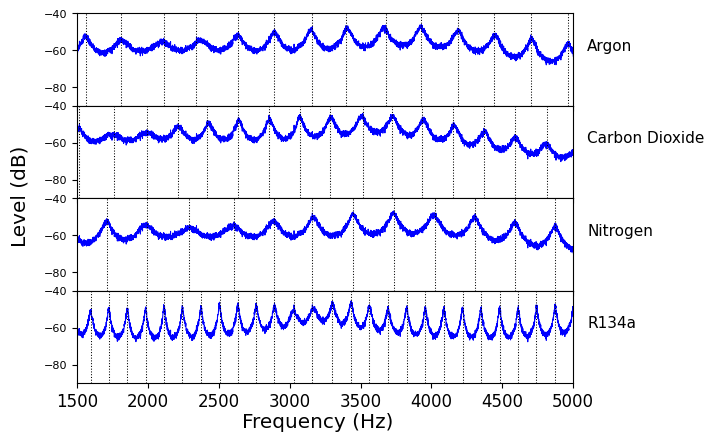

In [ ]:
# @title
fig = plt.figure()
gs = fig.add_gridspec(4, hspace=0)
axs = gs.subplots(sharex=True, sharey=True)

#Hide x labels and tick labels for all but bottom plot.
for ax in axs:
    ax.label_outer()

axs[0].plot(Argon_Spectrum['Frequency (Hz)'], Argon_Spectrum['Level (dB)'], 'b-', label = 'Argon')
axs[1].plot(Carbon_Dioxide_Spectrum['Frequency (Hz)'], Carbon_Dioxide_Spectrum['Level (dB)'], 'b-', label = 'Carbon Dioxide')
axs[2].plot(Nitrogen_Spectrum['Frequency (Hz)'], Nitrogen_Spectrum['Level (dB)'], 'b-', label = 'Nitrogen')
axs[3].plot(R134a_Spectrum['Frequency (Hz)'], R134a_Spectrum['Level (dB)'], 'b-', label = 'R134a')

plt.axis([1500,5000,-90,-40])
fig.supxlabel('Frequency (Hz)')
fig.supylabel('Level (dB)')

for y in range(len(gas2_peaks[0])):
  axs[0].axvline(x = gas2_peak_list.iloc[y], color='k',linestyle='dotted')
for y in range(len(gas3_peaks[0])):
  axs[1].axvline(x = gas3_peak_list.iloc[y], color='k',linestyle='dotted')
for y in range(len(gas5_peaks[0])):
  axs[2].axvline(x = gas5_peak_list.iloc[y], color='k',linestyle='dotted')
for y in range(len(gas6_peaks[0])):
  axs[3].axvline(x = gas6_peak_list.iloc[y], color='k',linestyle='dotted')


#Annotate Plot with text
axs[0].text(5100, -60, 'Argon', fontsize=11)
axs[1].text(5100, -60, 'Carbon Dioxide', fontsize=11)
axs[2].text(5100, -60, 'Nitrogen', fontsize=11)
axs[3].text(5100, -60, 'R134a', fontsize=11)


#Changing the Font Size Using rcParams
plt.rc('axes', labelsize=12)        # Controls Axes Labels
plt.rc('xtick', labelsize=12)       # Controls x Tick Labels
plt.rc('ytick', labelsize=8)       # Controls y Tick Labels
plt.rcParams['lines.linewidth'] = 0.75   # Controls linewidth for all Plots

#Show the plot in this notebook
plt.show()

Figure 7. Sound data plot of all 4 gases from 1500-5000 Hz with peaks being selected by Scipy. These are the peaks that were used to create the Fourier transform for determining speed of sound with slope of the line from a linear regession.

In [ ]:
# Speed of Sound for Gases 1 (Ar), 2 (CO2) and 3 (N2) in m/s.
c1 = 322  # Argon
c2 = 270.069  # Carbon Dioxide
c3 = 352.7289  # Nitrogen
c4 = 174.2128  # Refrigerant Gas (calculated previously)

# Molar mass of the gases in kg/mol
M1 = 0.039948  # Argon
M2 = 0.04401  # Carbon Dioxide
M3 = 0.028014  # Nitrogen
M4 = 0.10203  # Refrigerant Gas (R134a, assumed)

# Ideal gas constant (J/(mol*K))
R = 8.31446261815324

# Temperature in Kelvin (assumed room temperature)
T = 294.75

# Calculate heat capacity ratio (gamma) for each gas
gamma1 = (c1**2 * M1) / (R * T)  # Argon
gamma2 = (c2**2 * M2) / (R * T)  # Carbon Dioxide
gamma3 = (c3**2 * M3) / (R * T)  # Nitrogen
gamma4 = (c4**2 * M4) / (R * T)  # Refrigerant Gas

# Print the results
print(f"Heat Capacity Ratio ($γ$):")
print(f"Argon: {gamma1:.3f}")
print(f"Carbon Dioxide: {gamma2:.3f}")
print(f"Nitrogen: {gamma3:.3f}")
print(f"Refrigerant Gas (R134a, assumed): {gamma4:.3f}")

Heat Capacity Ratio ($γ$):
Argon: 1.690
Carbon Dioxide: 1.310
Nitrogen: 1.422
Refrigerant Gas (R134a, assumed): 1.264
